In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

# Efecto Zeeman

In [2]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

def Get_sigma(Cov):
    sigmaai = np.sqrt(np.diagonal(Cov))
    return sigmaai[::-1]

def Error_relativo(X_real,X_exp):
    return (np.abs(X_exp - X_real)/X_real)

def presicion(d,v):
    p = (d/v)
    if p <= 0.1:
        return p,True
    else:
        return p,False
    
def exactitud(xr,xm,d):
    e = (np.abs(xr-xm))
    if e <= (2.5*d):
        return e/d,True
    else:
        return e/d,False

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

In [3]:
c = 299798458*1e09 #nm/s
c_ = 299798458 #m/s
me = 0.51099895*1e06/(c**2) #eV/c**2
me_ = 0.51099895*1e06/(c_**2) #eV/c**2
mp = 938.27208816*1e06/(c**2) #eV/c**2
mn = 939.56542052*1e06/(c**2) #eV/c**2
h = 4.136667696*1e-15 #eV*s
h_barra = 6.582119569*1e-16 #eV*s
e_0 = 55.26349406*1e-03 #e**2/(cV*nm)
e = 1 #e
a_0 = 0.0529177210903 #nm
Ry = 13.605693122994 #eV
Miu_B = 5.7883818066*1e-05 #eV/T
Miu_B

5.7883818066000007e-05

In [4]:
(e*h_barra)/(2*me_)

5.788613503461989e-05

# Datos

In [5]:
# Teóricos
Ne_n = 640.2248
Ne_a = 724.51665
Cd = 643.84695
Ar = 727.2936
#Experimentales
px_Ne_Cd = 1067
px_Ne_Ar = 1025
e_px = 0.5

# Análisis

calibración

In [6]:
# Zeeman normal
def cal_normal (px):
    return px*(np.abs(Cd-Ne_n)/px_Ne_Cd)

def e_cal_n (px):
    return (np.abs(Cd-Ne_n)/(px_Ne_Cd))*(e_px)*np.sqrt(1+((2*(px**2))/(px_Ne_Cd**2)))

np.round(np.array((cal_normal(1.),e_cal_n(1.))),5)

array([0.00339, 0.0017 ])

In [7]:
# Zeeman anómalo
def cal_anomalo (px):
    return px*(np.abs(Ar-Ne_a)/px_Ne_Ar)

def e_cal_a (px):
    return (np.abs(Ar-Ne_a)/(px_Ne_Ar))*(e_px)*np.sqrt(1+((2*(px**2))/(px_Ne_Ar**2)))

np.round(np.array((cal_anomalo(1.),e_cal_a(1.))),5)

array([0.00271, 0.00135])

In [8]:
# Distancias medidas desde la mitad

Zeeman normal

In [9]:
d_px = 5.
d_nm = cal_normal(d_px)
d_nm

0.016973523898781786

In [10]:
e_d_nm = e_cal_n(d_px)
e_d_nm

0.0016973896615108924

In [11]:
np.round(np.array([d_nm,e_d_nm]),4)

array([0.017 , 0.0017])

In [12]:
#d_nm_ = cal_normal(d_px+1)
#((h*c)/(Cd**2))*(d_nm_)*(1.602176634*(10**(-19)))

In [13]:
#((h*c)*((1/Cd)-(1/(Cd+d_nm_))))*(1.602176634*(10**(-19)))

In [14]:
d_E = ((h*c)/(Cd**2))*(d_nm) #eV
d_E

5.0779305915927785e-05

In [15]:
# En Joules
d_E*(1.602176634*(10**(-19)))

8.135741742923747e-24

In [16]:
e_d_E = ((h*c)/(Cd**2))*(e_d_nm)
e_d_E

5.07804209628979e-06

In [17]:
np.round(np.array([d_E,e_d_E]),7)

array([5.08e-05, 5.10e-06])

In [18]:
presicion(e_d_E,d_E)

(0.10000219586886824, False)

In [19]:
B = d_E/Miu_B #T
B

0.8772625513062814

In [20]:
e_B = (1/Miu_B)*(e_d_E)
e_B

0.08772818148415383

In [21]:
presicion(e_B,B)

(0.10000219586886824, False)

- Perpendicular

In [22]:
I = 4.94

- Paralelo

In [23]:
I = 4.93

Zeeman anómalo

In [24]:
d_px_1 = 4.5
d_px_2 = 12.
d_px_3 = 16.
d_nm_1 = cal_anomalo(d_px_1)
d_nm_2 = cal_anomalo(d_px_2)
d_nm_3 = cal_anomalo(d_px_3)
(d_nm_1,d_nm_2,d_nm_3)

(0.012191487804877797, 0.03251063414634079, 0.043347512195121056)

In [25]:
np.round(np.array((d_nm_1,d_nm_2,d_nm_3)),4)

array([0.0122, 0.0325, 0.0433])

In [26]:
e_d_nm_1 = e_cal_a(d_nm_1)
e_d_nm_2 = e_cal_a(d_nm_2)
e_d_nm_3 = e_cal_a(d_nm_3)
(e_d_nm_1,e_d_nm_2,e_d_nm_3)

(0.00135460975628917, 0.0013546097574602867, 0.001354609758520206)

In [27]:
np.round(np.array((e_d_nm_1,e_d_nm_2,e_d_nm_3)),4)

array([0.0014, 0.0014, 0.0014])

In [28]:
d_E_1 = ((h*c)/(Ne_a**2))*(d_nm_1) #eV
d_E_2 = ((h*c)/(Ne_a**2))*(d_nm_2) #eV
d_E_3 = ((h*c)/(Ne_a**2))*(d_nm_3) #eV
(d_E_1,d_E_2,d_E_3)

(2.8803150749121196e-05, 7.680840199765652e-05, 0.00010241120266354203)

In [29]:
# En Joules
tuple(np.array([d_E_1,d_E_2,d_E_3])*(1.602176634*(10**(-19))))

(4.614773511582158e-24, 1.230606269755242e-23, 1.640808359673656e-23)

In [30]:
np.round(np.array((d_E_1,d_E_2,d_E_3)),6)

array([2.90e-05, 7.70e-05, 1.02e-04])

In [31]:
e_d_E_1 = ((h*c)/(Ne_a**2))*(e_d_nm_1)
e_d_E_2 = ((h*c)/(Ne_a**2))*(e_d_nm_2)
e_d_E_3 = ((h*c)/(Ne_a**2))*(e_d_nm_3)
(e_d_E_1,e_d_E_2,e_d_E_3)

(3.200350083688443e-06, 3.2003500864552792e-06, 3.2003500889594047e-06)

In [32]:
np.round(np.array((e_d_E_1,e_d_E_2,e_d_E_3)),6)

array([3.e-06, 3.e-06, 3.e-06])

In [33]:
(presicion(e_d_E_1,d_E_1),presicion(e_d_E_2,d_E_2),presicion(e_d_E_3,d_E_3))

((0.11111111112683004, False),
 (0.041666666708583835, True),
 (0.03125000005588955, True))

- Perpendicular

In [34]:
I = 4.93

- Paralelo

In [35]:
I = 4.92

Landé factor

In [36]:
g_12 = 2/3
g_32 = 4/3

In [37]:
mj_32 = np.array([-3/2,-1/2,1/2,3/2])
mj_12 = np.array([-1/2,1/2])

def GetComponents(mj_i,mj_f,g_i,g_f,tolerancia = 10):
    
    sigmas = np.array([])
    pis = np.array([])
    
    for i in mj_i:
         for j in mj_f:
            l = ((Ne_a**2)/(h*c))*Miu_B*B*(g_i*i-g_f*j)

            if  type(l)!=bool:
                if (i-j==0):
                    croot = np.round( l, tolerancia )
                    if croot not in pis:
                        pis = np.append(pis, croot)

                if (i-j==1):
                    croot = np.round( l, tolerancia )
                    if croot not in sigmas:
                        sigmas = np.append(sigmas, croot)

                if (i-j==-1):
                    croot = np.round( l, tolerancia )
                    if croot not in sigmas:
                        sigmas = np.append(sigmas, croot)
                    
    pis.sort()
    sigmas.sort()
    return (sigmas,pis)

def GetLambdas():
    
    sigmas = np.array([])
    pis = np.array([])

    mj_g = np.array([(mj_12,g_12),(mj_32,g_32)])
    for i in mj_g:
        for j in mj_g:
            sig,pi = GetComponents(i[0],j[0],i[1],j[1])
            for l in sig:
                if type(l)!=bool:
                    if l not in sigmas:
                        sigmas = np.append(sigmas, l)
            for l in pi:
                if type(l)!=bool:
                    if l not in pis:
                        pis = np.append(pis, l)
                    
    pis.sort()
    sigmas.sort()
    return (sigmas,pis)

def GetErrorsLambdas(mj_i,mj_f,g_i,g_f,tolerancia = 10):
    
    sigmas = np.array([])
    pis = np.array([])
    
    for i in mj_i:
         for j in mj_f:
            l = ((Ne_a**2)/(h*c))*Miu_B*e_B*(g_i*i-g_f*j)

            if  type(l)!=bool:
                if (i-j==0):
                    croot = np.round( l, tolerancia )
                    if croot not in pis:
                        pis = np.append(pis, croot)

                if (i-j==1):
                    croot = np.round( l, tolerancia )
                    if croot not in sigmas:
                        sigmas = np.append(sigmas, croot)

                if (i-j==-1):
                    croot = np.round( l, tolerancia )
                    if croot not in sigmas:
                        sigmas = np.append(sigmas, croot)
                    
    pis.sort()
    sigmas.sort()
    return (sigmas,pis)

- Caso 1

In [38]:
GetComponents(mj_12,mj_12,g_12,g_12)

(array([-0.01432888,  0.01432888]), array([0.]))

In [39]:
GetErrorsLambdas(mj_12,mj_12,g_12,g_12)

(array([-0.00143292,  0.00143292]), array([0.]))

- Caso 2

In [40]:
GetComponents(mj_32,mj_12,g_32,g_12)

(array([-0.0358222 , -0.02149332,  0.02149332,  0.0358222 ]),
 array([-0.00716444,  0.00716444]))

In [41]:
GetErrorsLambdas(mj_32,mj_12,g_32,g_12)

(array([-0.0035823 , -0.00214938,  0.00214938,  0.0035823 ]),
 array([-0.00071646,  0.00071646]))

- Caso 3

In [42]:
GetComponents(mj_12,mj_32,g_12,g_32)

(array([-0.0358222 , -0.02149332,  0.02149332,  0.0358222 ]),
 array([-0.00716444,  0.00716444]))

In [43]:
GetErrorsLambdas(mj_12,mj_32,g_12,g_32)

(array([-0.0035823 , -0.00214938,  0.00214938,  0.0035823 ]),
 array([-0.00071646,  0.00071646]))

- Caso 4

In [44]:
GetComponents(mj_32,mj_32,g_32,g_32)

(array([-0.02865776,  0.02865776]), array([0.]))

In [45]:
GetErrorsLambdas(mj_32,mj_32,g_32,g_32)

(array([-0.00286584,  0.00286584]), array([0.]))

Escogemos el caso 2 o 3:

In [46]:
L = GetComponents(mj_32,mj_12,g_32,g_12)

Text(0.5, 0, 'Longitud de onda (nm)')

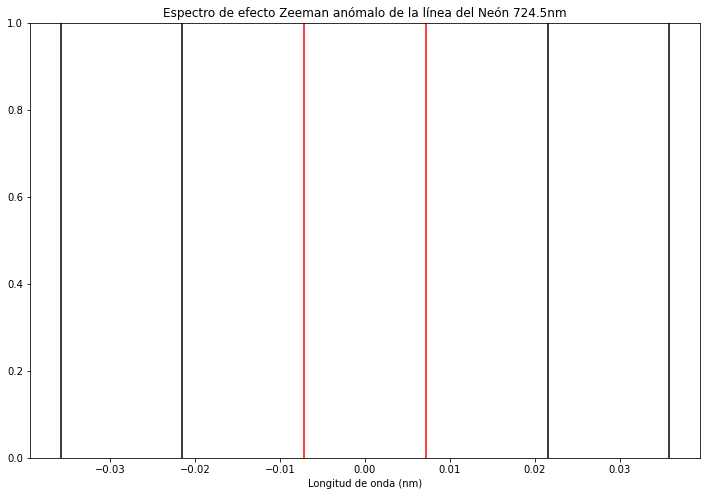

In [47]:
plt.figure(figsize=(12, 8))
for i in L[0]:
    plt.axvline(x=i,color='k')
for i in L[1]:
    plt.axvline(x=i,color='r')
plt.title('Espectro de efecto Zeeman anómalo de la línea del Neón 724.5nm')
plt.xlabel('Longitud de onda (nm)')